<h2>Import Statements<h2>

In [2]:
#import statements
import numpy as np
import rasterio
from affine import Affine
import matplotlib.pyplot as plt
import matplotlib.image as mping
import matplotlib.colors as colors
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import tifffile as tif
import os
import datetime
from statistics import mean

<h2>Iterate trhough each image an add to 3d Numpy Array<h2>

In [3]:
#New Records is a folder with folders inside broken by year with images for that year inside
path = r'/Users/ayushirajpoot/Desktop/Community Detection/New_Records'
final = []
original = []
for file in sorted(os.listdir(path)):
    print(file)
    file_name = '/Users/ayushirajpoot/Desktop/Community Detection/New_Records/' + file
    if not file.startswith('.'): 
        print(file_name)
        for image in sorted(os.listdir(file_name)):
            fname = file_name + '/' + image
            source_file = rasterio.open(fname) #read tiff image and add data in the for of an array to 3d array
            data_in = source_file.read(1)
            d = np.log(np.clip(data_in, 1, 3000))
            data_scale = (255*(d - np.amin(d))/np.ptp(d)).astype(np.uint8)
            data_scale = data_scale[::50,::50]
            data_scale = data_scale.astype('float')
            data_scale[data_scale == 0] = np.nan #replace missing values with nans
            final.append(data_scale)

.DS_Store
2015
/Users/ayushirajpoot/Desktop/Community Detection/New_Records/2015
2016
/Users/ayushirajpoot/Desktop/Community Detection/New_Records/2016
2017
/Users/ayushirajpoot/Desktop/Community Detection/New_Records/2017
2018
/Users/ayushirajpoot/Desktop/Community Detection/New_Records/2018
2019
/Users/ayushirajpoot/Desktop/Community Detection/New_Records/2019
2020
/Users/ayushirajpoot/Desktop/Community Detection/New_Records/2020
2021
/Users/ayushirajpoot/Desktop/Community Detection/New_Records/2021


<h2>Show One Map Before Detrending<h2>

(88, 274, 152)


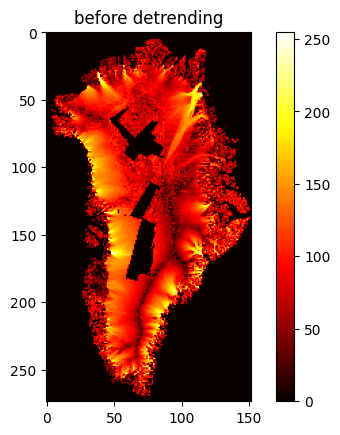

In [4]:
print(np.asarray(final).shape)
fig = plt.imshow(final[87], cmap='hot')
plt.colorbar()
plt.title("before detrending")
plt.show()

<h2>Rearrange the array to (137, 76, 10) shape for detrending purposes<h2>

In [28]:
# Rearrange the array to (137, 76, 10) shape
rearranged_array1 = np.transpose(final, (1, 2, 0))
#rearranged_array2 = np.transpose(original, (1, 2, 0))

# Check the shape of the resulting array
print(rearranged_array1.shape)

(1370, 759, 88)


<h2>Detrending Processes<h2>

In [29]:
constant_x = range(np.asarray(rearranged_array1).shape[2])
for row in range(1370):
    for col in range(759):
        current_y = rearranged_array1[row][col]
        non_zero_values = [value for value in current_y if not np.isnan(value)]
        current_x = [idx for idx, value in enumerate(current_y) if not np.isnan(value)]
        if (len(non_zero_values) > 0):
            m, b = np.polyfit(current_x, non_zero_values, 1)
            new_current_y = [(val - (m*i+b)) if not np.isnan(val) else np.nan for i, val in enumerate(current_y)]
            rearranged_array1[row][col] = new_current_y

/Users/ayushirajpoot/opt/anaconda3/envs/tfod/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ayushirajpoot/opt/anaconda3/envs/tfod/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ayushirajpoot/opt/anaconda3/envs/tfod/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ayushirajpoot/opt/anaconda3/envs/tfod/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/ayushirajpoot/opt/anaconda3/envs/tfod/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly condition

<h2>Revert to Original Shape (reshape again)<h2>

In [30]:
final = np.transpose(rearranged_array1, (2, 0, 1))
print(final.shape)

(88, 1370, 759)


<h2>Post Detrending Map<h2>

(88, 1370, 759)


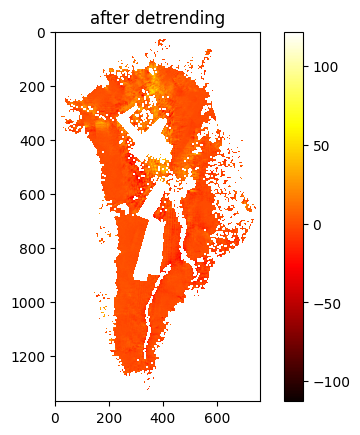

In [31]:
print(np.asarray(final).shape)
fig = plt.imshow(final[87], cmap='hot')
plt.colorbar()
plt.title("after detrending")
plt.show()

<h2>Save as a Npy file for community detection algorithm<h2>

In [25]:
np.save('10th_subsample', final)